In [2]:
from packages.loaders import DataLoader
from notebooks.open_datasets.russian_inappropriate_messages.common import path_to_data, path_to_models
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.optimizers import SGD
from keras.layers import Dense, Dropout

train_x = DataLoader.load_numpy_array(path_to_data / 'sbert_and_perceptron' / "train_x_dense_for_perceptron.npy")
train_y = DataLoader.load_numpy_array(path_to_data / 'sbert_and_perceptron' / "train_y_dense_for_perceptron.npy")
test_x = DataLoader.load_numpy_array(path_to_data / 'sbert_and_perceptron' / "test_x_dense_for_perceptron.npy")
test_y = DataLoader.load_numpy_array(path_to_data / 'sbert_and_perceptron' / "test_y_dense_for_perceptron.npy")

train_x.shape, train_y.shape, test_x.shape, test_y.shape

((99675,), (99675, 18), (24995,), (24995, 18))

In [3]:
import numpy as np

dense_tensor_test = np.array([x.numpy() for x in test_x])
dense_tensor_train = np.array([x.numpy() for x in train_x])
dense_tensor_train

array([[-0.2594728 , -0.60044813, -0.39851883, ..., -0.3670128 ,
        -0.3340717 , -0.3499126 ],
       [ 0.39574736, -1.0346919 ,  0.09063911, ..., -0.4454708 ,
         0.06091923,  0.42845067],
       [ 0.3674083 , -0.3066017 , -0.17399396, ..., -0.48750213,
         0.39706594,  0.0611933 ],
       ...,
       [ 0.00884132, -0.16324571,  0.20688833, ...,  0.18000361,
        -0.04088392, -0.17240533],
       [-0.50505704, -0.5671449 , -0.3849291 , ...,  0.00754684,
        -0.14070836,  0.25053844],
       [ 0.20709492, -0.2258115 ,  0.48218024, ..., -0.73097557,
         0.96465725,  0.5079209 ]], dtype=float32)

In [4]:
import time
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras import Input

INPUT_SHAPE = dense_tensor_train.shape[1]
OUTPUT_SHAPE = train_y.shape[1]

early_stop = EarlyStopping(monitor='val_loss', min_delta=0.05, patience=7, restore_best_weights=True)

In [61]:
start = time.time()

model = Sequential()

model.add(Input(shape=(INPUT_SHAPE,), sparse=True))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(OUTPUT_SHAPE, activation='softmax'))

optimizer  = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer , metrics=['accuracy'])

history_training = model.fit(dense_tensor_train, train_y, epochs=50, batch_size=5, callbacks=[early_stop], validation_data=(dense_tensor_test, test_y), workers=-1)

total_pred_time = time.time() - start
print(total_pred_time)

Epoch 1/50
19935/19935 [==============================] - 56s 3ms/step - loss: 2.8601 - accuracy: 0.0822 - val_loss: 2.7745 - val_accuracy: 0.1185
Epoch 2/50
19935/19935 [==============================] - 54s 3ms/step - loss: 2.8378 - accuracy: 0.0859 - val_loss: 2.7570 - val_accuracy: 0.1157
Epoch 3/50
19935/19935 [==============================] - 61s 3ms/step - loss: 2.8284 - accuracy: 0.0867 - val_loss: 2.7621 - val_accuracy: 0.1140
Epoch 4/50
19935/19935 [==============================] - 60s 3ms/step - loss: 2.8343 - accuracy: 0.0838 - val_loss: 2.8024 - val_accuracy: 0.0958
Epoch 5/50
19935/19935 [==============================] - 61s 3ms/step - loss: 2.8348 - accuracy: 0.0843 - val_loss: 2.7784 - val_accuracy: 0.0821
Epoch 6/50
19935/19935 [==============================] - 57s 3ms/step - loss: 2.8542 - accuracy: 0.0737 - val_loss: 2.8818 - val_accuracy: 0.0642
Epoch 7/50
19935/19935 [==============================] - 55s 3ms/step - loss: 2.8660 - accuracy: 0.0679 - val_loss: 2

In [62]:
start = time.time()

model_2 = Sequential()

model_2.add(Input(shape=(INPUT_SHAPE,), sparse=True))
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.4))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dropout(0.4))
model_2.add(Dense(OUTPUT_SHAPE, activation='softmax'))

optimizer  = Adam(learning_rate=0.01)
model_2.compile(loss='categorical_crossentropy', optimizer=optimizer , metrics=['accuracy'])

history_training_2 = model_2.fit(dense_tensor_train, train_y, epochs=100, batch_size=5, callbacks=[early_stop], validation_data=(dense_tensor_test, test_y), workers=-1)

total_pred_time = time.time() - start
print(total_pred_time)

Epoch 1/100
19935/19935 [==============================] - 43s 2ms/step - loss: 2.8870 - accuracy: 0.0636 - val_loss: 2.8784 - val_accuracy: 0.0602
Epoch 2/100
19935/19935 [==============================] - 44s 2ms/step - loss: 2.8793 - accuracy: 0.0636 - val_loss: 2.8798 - val_accuracy: 0.0653
Epoch 3/100
19935/19935 [==============================] - 44s 2ms/step - loss: 2.8786 - accuracy: 0.0629 - val_loss: 2.8797 - val_accuracy: 0.0619
Epoch 4/100
19935/19935 [==============================] - 41s 2ms/step - loss: 2.8785 - accuracy: 0.0624 - val_loss: 2.8792 - val_accuracy: 0.0583
Epoch 5/100
19935/19935 [==============================] - 40s 2ms/step - loss: 2.8781 - accuracy: 0.0631 - val_loss: 2.8774 - val_accuracy: 0.0642
Epoch 6/100
19935/19935 [==============================] - 43s 2ms/step - loss: 2.8784 - accuracy: 0.0633 - val_loss: 2.8762 - val_accuracy: 0.0659
Epoch 7/100
19935/19935 [==============================] - 41s 2ms/step - loss: 2.8777 - accuracy: 0.0637 - val_

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set()

def draw_plot(data, type_data):
    plt.figure(figsize=(25, 5))
    plt.plot(data, 'darkorange', label='Train')
    plt.xlabel('Epoch')
    plt.ylabel(type_data)
    plt.legend()


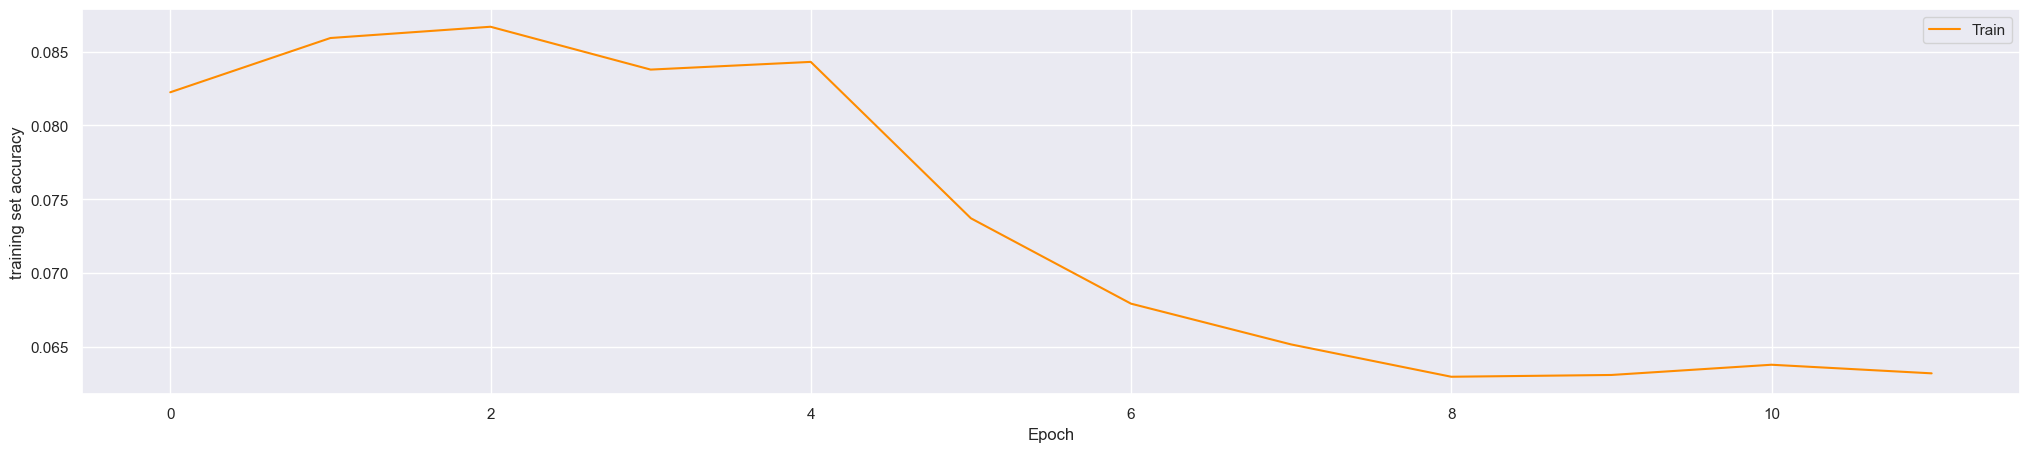

In [64]:
draw_plot(history_training.history['accuracy'], 'training set accuracy')

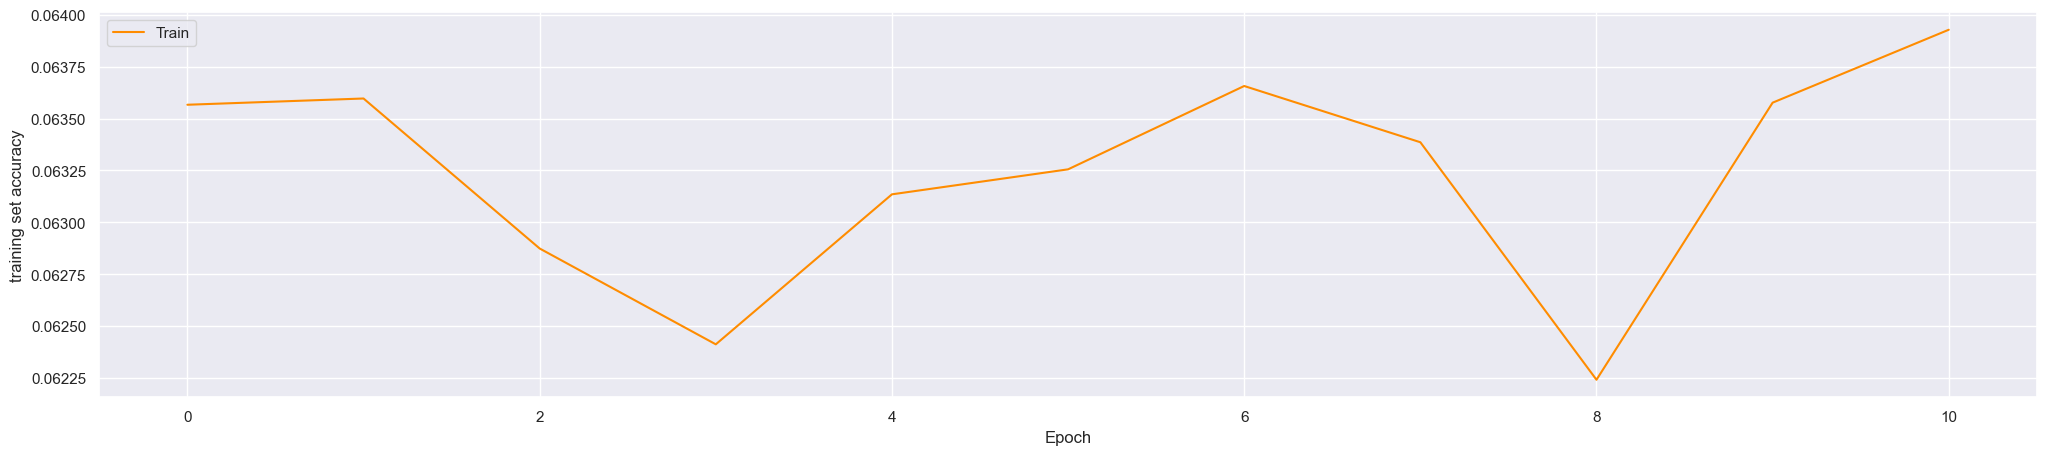

In [65]:
draw_plot(history_training_2.history['accuracy'], 'training set accuracy')

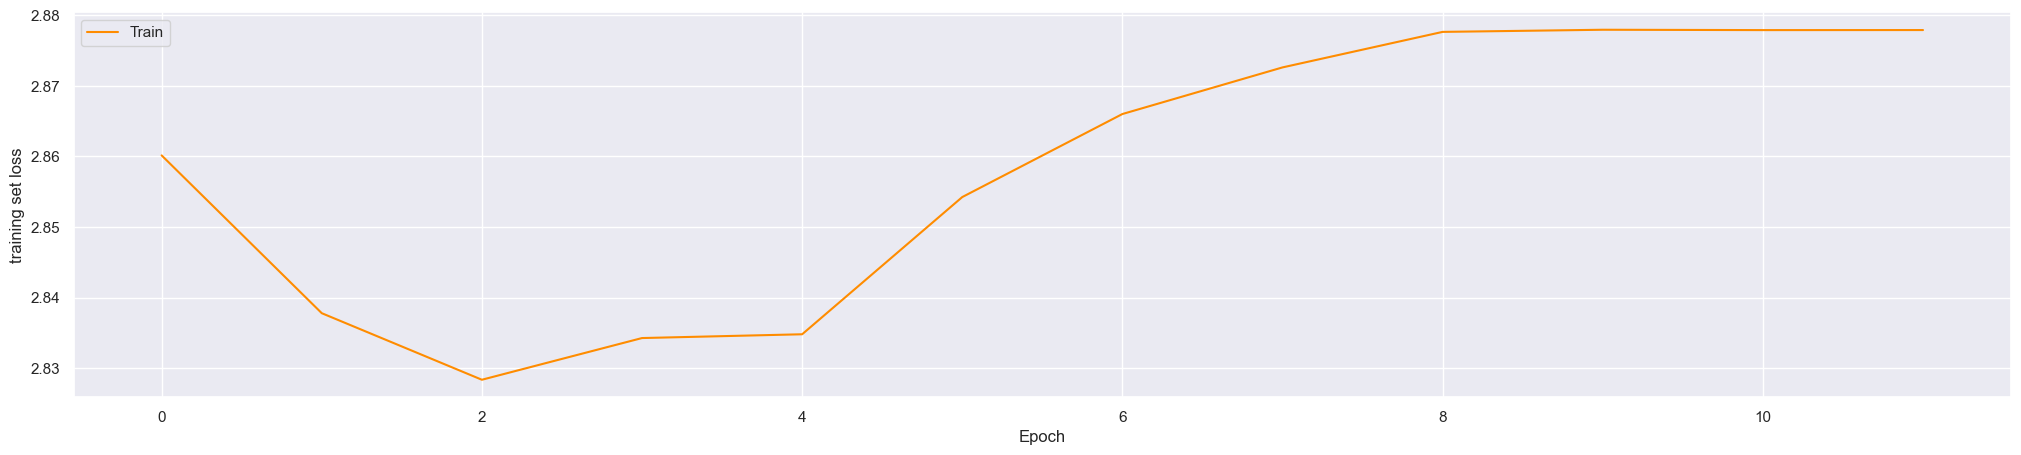

In [66]:
draw_plot(history_training.history['loss'], 'training set loss')

In [67]:
draw_plot(history_training_2.history['loss'], 'training set loss')

In [68]:
# model.save(path_to_models / "sbert_and_perceptron" / "perceptron.h5")

In [69]:
# model_2.save(path_to_models / "sbert_and_perceptron" / "perceptron_2.h5")

In [71]:
start = time.time()

model_3 = Sequential()

model_3.add(Input(shape=(INPUT_SHAPE,), sparse=True))
model_3.add(Dense(128, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.4))
model_3.add(Dense(64, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.4))
model_3.add(Dense(OUTPUT_SHAPE, activation='softmax'))

optimizer  = Adam(learning_rate=0.01)
model_3.compile(loss='categorical_crossentropy', optimizer=optimizer , metrics=['accuracy'])

history_training_3 = model_3.fit(dense_tensor_train, train_y, epochs=100, batch_size=25, callbacks=[early_stop], validation_data=(dense_tensor_test, test_y))

total_pred_time = time.time() - start
print(total_pred_time)

Epoch 1/100
3987/3987 [==============================] - 12s 3ms/step - loss: 1.5565 - accuracy: 0.5376 - val_loss: 1.2802 - val_accuracy: 0.6121
Epoch 2/100
3987/3987 [==============================] - 10s 2ms/step - loss: 1.4449 - accuracy: 0.5729 - val_loss: 1.2549 - val_accuracy: 0.6204
Epoch 3/100
3987/3987 [==============================] - 10s 3ms/step - loss: 1.4076 - accuracy: 0.5846 - val_loss: 1.2402 - val_accuracy: 0.6242
Epoch 4/100
3987/3987 [==============================] - 10s 3ms/step - loss: 1.3866 - accuracy: 0.5933 - val_loss: 1.2190 - val_accuracy: 0.6344
Epoch 5/100
3987/3987 [==============================] - 12s 3ms/step - loss: 1.3678 - accuracy: 0.5987 - val_loss: 1.1999 - val_accuracy: 0.6375
Epoch 6/100
3987/3987 [==============================] - 11s 3ms/step - loss: 1.3510 - accuracy: 0.6032 - val_loss: 1.2265 - val_accuracy: 0.6349
Epoch 7/100
3987/3987 [==============================] - 11s 3ms/step - loss: 1.3424 - accuracy: 0.6052 - val_loss: 1.2023 -

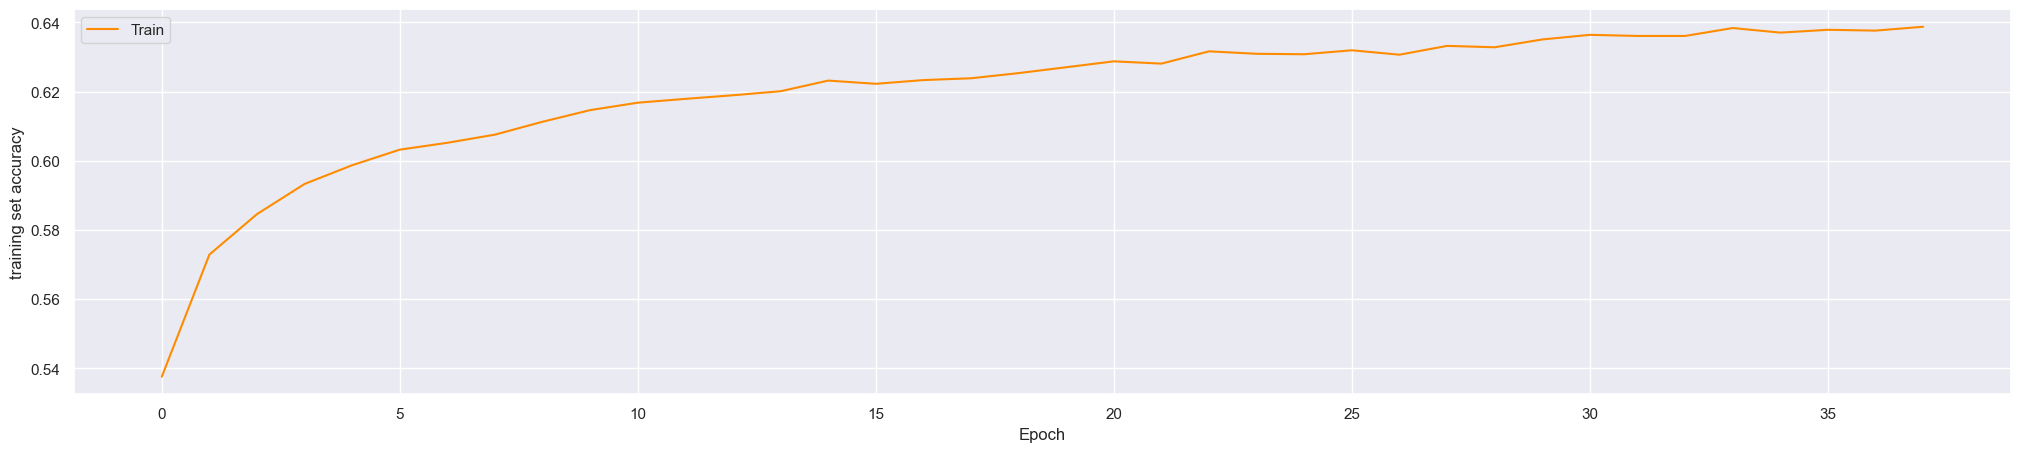

In [72]:
draw_plot(history_training_3.history['accuracy'], 'training set accuracy')

In [73]:
draw_plot(history_training_3.history['loss'], 'training set loss')

In [74]:
# model_3.save(path_to_models / "sbert_and_perceptron" / "perceptron_3.h5")

In [18]:
start = time.time()

model_4 = Sequential()

model_4.add(Input(shape=(INPUT_SHAPE,), sparse=True))
model_4.add(Dense(256, activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.4))
model_4.add(Dense(64, activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.4))
model_4.add(Dense(OUTPUT_SHAPE, activation='softmax'))

early_stop = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10, restore_best_weights=True)
optimizer  = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# optimizer  = Adam(learning_rate=0.01)
model_4.compile(loss='categorical_crossentropy', optimizer=optimizer , metrics=['accuracy'])

history_training_4 = model_4.fit(dense_tensor_train, train_y, epochs=100, batch_size=25, callbacks=[early_stop], validation_data=(dense_tensor_test, test_y))

total_pred_time = time.time() - start
print(total_pred_time)

Epoch 1/100
3987/3987 [==============================] - 17s 4ms/step - loss: 1.5212 - accuracy: 0.5478 - val_loss: 1.2365 - val_accuracy: 0.6246
Epoch 2/100
3987/3987 [==============================] - 15s 4ms/step - loss: 1.3772 - accuracy: 0.5906 - val_loss: 1.2097 - val_accuracy: 0.6294
Epoch 3/100
3987/3987 [==============================] - 14s 4ms/step - loss: 1.3375 - accuracy: 0.6025 - val_loss: 1.1900 - val_accuracy: 0.6374
Epoch 4/100
3987/3987 [==============================] - 13s 3ms/step - loss: 1.3140 - accuracy: 0.6098 - val_loss: 1.1761 - val_accuracy: 0.6412
Epoch 5/100
3987/3987 [==============================] - 13s 3ms/step - loss: 1.2942 - accuracy: 0.6167 - val_loss: 1.1678 - val_accuracy: 0.6441
Epoch 6/100
3987/3987 [==============================] - 13s 3ms/step - loss: 1.2804 - accuracy: 0.6186 - val_loss: 1.1601 - val_accuracy: 0.6463
Epoch 7/100
3987/3987 [==============================] - 12s 3ms/step - loss: 1.2719 - accuracy: 0.6227 - val_loss: 1.1589 -

In [19]:
draw_plot(history_training_4.history['accuracy'], 'training set accuracy')

In [20]:
draw_plot(history_training_4.history['loss'], 'training set loss')

In [21]:
model_4.save(path_to_models / "sbert_and_perceptron" / "perceptron_4.h5")

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

start = time.time()

# Создаем объект классификатора k-NN
knn_model = KNeighborsClassifier(n_neighbors=5)

# Обучаем модель на тренировочных данных
knn_model.fit(dense_tensor_train, train_y.argmax(axis=1))

# Предсказываем классы на тестовых данных
train_y_pred = knn_model.predict(dense_tensor_train)
test_y_pred = knn_model.predict(dense_tensor_test)

# Вычисляем точность классификации
train_accuracy = accuracy_score(train_y.argmax(axis=1), train_y_pred)
test_accuracy = accuracy_score(test_y.argmax(axis=1), test_y_pred)

total_pred_time = time.time() - start
total_pred_time, train_accuracy, test_accuracy

(114.3051106929779, 0.6875545522949587, 0.5572714542908582)

In [ ]:
# import joblib
#
# joblib.dump(knn_model, path_to_models / 'sbert_and_perceptron' / 'knn.joblib')

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Определяем параметры, которые нужно перебрать
param_grid = {
    'n_neighbors': list(range(3, 35, 2)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
# Создаем объект GridSearchCV
grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=1,
    verbose=True
)

start = time.time()

grid_search.fit(dense_tensor_train, train_y.argmax(axis=1))
# Выводим лучшие параметры и точность на кросс-валидации
print(f"Best params – {grid_search.best_params_}")
# Предсказываем классы на тестовых данных с помощью лучшей модели
train_y_pred = grid_search.predict(dense_tensor_train)
test_y_pred = grid_search.predict(dense_tensor_test)
# Вычисляем точность классификации
train_accuracy = accuracy_score(train_y.argmax(axis=1), train_y_pred)
test_accuracy = accuracy_score(test_y.argmax(axis=1), test_y_pred)

total_pred_time = time.time() - start
total_pred_time, grid_search.best_score_, train_accuracy, test_accuracy

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best params – {'n_neighbors': 31, 'p': 1, 'weights': 'distance'}


(20327.09054708481, 0.5984951091045899, 0.9998796087283672, 0.5973994798959792)

In [6]:
# from packages.loaders import ModelLoader
#
# joblib.dump(grid_search.best_estimator_, path_to_models / 'sbert_and_perceptron' / 'knn2.joblib')
# Получившаяся модель весит 320 мб
# ModelLoader.load(path_to_models / "sbert_and_perceptron" / 'knn2.joblib').get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 31,
 'p': 1,
 'weights': 'distance'}

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

start = time.time()

# Создаем объект классификатора k-NN
knn_model = KNeighborsClassifier(n_neighbors=5)

# Обучаем модель на тренировочных данных
knn_model.fit(dense_tensor_train, train_y.argmax(axis=1))

# Предсказываем классы на тестовых данных
train_y_pred = knn_model.predict(dense_tensor_train)
test_y_pred = knn_model.predict(dense_tensor_test)

# Вычисляем точность классификации
train_accuracy = accuracy_score(train_y.argmax(axis=1), train_y_pred)
test_accuracy = accuracy_score(test_y.argmax(axis=1), test_y_pred)

total_pred_time = time.time() - start
total_pred_time, train_accuracy, test_accuracy

(115.86315298080444, 0.6875545522949587, 0.5572714542908582)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

start = time.time()

# Создаем объект классификатора k-NN
knn_model = KNeighborsClassifier(n_neighbors = 31, p = 1, weights = "distance")

# Обучаем модель на тренировочных данных
knn_model.fit(dense_tensor_train, train_y.argmax(axis=1))

# Предсказываем классы на тестовых данных
train_y_pred = knn_model.predict(dense_tensor_train)
test_y_pred = knn_model.predict(dense_tensor_test)

# Вычисляем точность классификации
train_accuracy = accuracy_score(train_y.argmax(axis=1), train_y_pred)
test_accuracy = accuracy_score(test_y.argmax(axis=1), test_y_pred)

total_pred_time = time.time() - start
total_pred_time, train_accuracy, test_accuracy

(962.309173822403, 0.9998796087283672, 0.5973994798959792)